## LeNet'98

Особенности LeNet5:

- Свёрточная нейросеть, использующая последовательность из трёх слоёв: слои свёртки (convolution), слои группирования (pooling) и слои нелинейности (non-linearity) –> с момента публикации работы Лекуна это, пожалуй, одна из главных особенностей глубокого обучения применительно к изображениям.
- Подвыборка с использованием усреднения карт.
- Нелинейность в виде гиперболического тангенса или сигмоид.
- Финальный классификатор в виде многослойной нейросети.

<img src='https://drive.google.com/uc?exoprt=view&id=1pPe1aBh7ySg89cxbWEZ07iabvvXABUxd'>

Многие предобученные модели обучались на датасете ImageNet, который содержит 14,197,122 картинок - это набор данных размечанных изображений с высоким разрешением, относящихся примерно к 22 тысячам категорий. Проводился «Крупномасштабный конкурс визуального распознавания ImageNet» (ILSVRC2013). ILSVRC использует подмножество ImageNet из примерно 1000 изображений в каждой из 1000 категорий.

<img src='https://avatars.mds.yandex.net/get-zen_doc/127510/pub_5c33ad37c906e200abbace3b_5c33adfbe5e73b00aad095a1/scale_1200'>

## AlexNet'12

В AlexNet результаты вычислений LeNet масштабированы в гораздо более крупную нейросеть, которая способна изучить намного более сложные объекты и их иерархии. Особенности:

- Использование блоков ReLU в качестве нелинейностей (градиенты затухают меньше, чем в сигмоиде).
- Использование max pooling, что позволяет избежать эффектов усреднения average pooling.

На вход идут картинки 224х224, естественно не все картинки такого размера, поэтому будет достаточно просто сжать их до нужного размера.

<img src='https://drive.google.com/uc?export=view&id=1sjEftFGiJ50-m3VevamktVznsx6bY3Yw' width=700>

## VGG'14
В разработанных в Оксфорде VGG-сетях в каждом свёрточном слое впервые применили фильтры 3х3 и объединили эти слои в последовательности свёрток.

Вместо применяемых в AlexNet фильтров 9х9 и 11х11 стали применять гораздо более мелкие фильтры, которых старались избежать авторы LeNet. Но большим преимуществом VGG стала находка, что несколько свёрток 3х3, объединённых в последовательность, могут эмулировать более крупные свертки, например, 5х5 или 7х7. Т.е. две свёртки 3х3 - это то же самое что и одна свёртка 5х5.

Каскад из двух сверток 3х3 равен свертке 5х5, но с меньшим количеством параметров. что намного лучше.
(5х5 = 25 + 1 = 26; 3x3 + 3x3 + 2 = 20) Меньше весов - быстрее обучение - лучше сходимость.

<img src='https://drive.google.com/uc?export=view&id=1GvrtEDocJ3xp9RKqgQu0-JnyTssqZhzV'>

VGG-16 потому что 16 слоёв. Есть ещё VGG-19 с 19-ю слоями.

Эти предобученые на имадженете сетки есть в Керасе.

Глубокие сверточные нейронные сети превзошли человеческий уровень классификации изображений в 2015 году. Глубокие сети извлекают низко-, средне- и высокоуровневые признаки  сквозным многослойным способом, а увеличение количества слоев обогатить «уровни» признаков. Но у глубоких нейронных сетей была проблема: затухающие градиенты. Особенно это явно чувствуется с сигмоидой.

Максимальный градиент сигмоиды равен 0.25. Это очень маленькое число. Если мы делаем цепочку сигмоид - градиент будет становиться ещё меньше.

$d\sigma = \sigma(1 - \sigma) \leqslant \frac{1}{4}$

<img src='https://drive.google.com/uc?export=view&id=171JbyNkSSqzhPdX4fp439zOouEzJmq_s'>

Это большая проблема. Из-за этого невозможно обучать большие глубокие нейронные сети. Для решения этой проблемы была придумана GoogLeNet.

## GoogLeNet

Эта сеть использует Inception блоки. Это **параллельная комбинация свёрточных фильтров** 1х1, 3х3 и 5х5. Но главная особенность заключается в использовании свёрточных блоков 1х1 для уменьшения количества каналов перед подачей в более «дорогие» сверточные блоки. Обычно эту часть называют bottleneck. Вместо использования свертки 5х5 на нашем изображении, можем сначала пройтись сверткой 1х1 уменьшив количество каналов, а затем по ним пройтись сверткой 5х5, вернув количество каналов. Операций будет меньше, а результат будет одинаковый.

<img src='https://drive.google.com/uc?export=view&id=1hgoTi6d-pdRPHgnfVGssQIQXBUdrkWrk'>

In [1]:
from keras.layers import Conv2D, Input
from keras.models import Model

inp = Input(shape=(8, 8, 256))
x = Conv2D(256, (5, 5))(inp)

model = Model(inp, x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8, 8, 256)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 4, 4, 256)         1638656   
Total params: 1,638,656
Trainable params: 1,638,656
Non-trainable params: 0
_________________________________________________________________


In [2]:
from keras.layers import Conv2D, Input
from keras.models import Model

inp = Input(shape=(8, 8, 256))
x = Conv2D(128, (1, 1))(inp)
x = Conv2D(256, (5, 5))(x)

model = Model(inp, x)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 8, 8, 256)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 128)         32896     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 256)         819456    
Total params: 852,352
Trainable params: 852,352
Non-trainable params: 0
_________________________________________________________________


Разработчики этой сети придумали способ, чтобы градиенты не затухали: вводится несколько вспомогательных функций на протяжении всей сети, чтобы когда градиент от первого выхода начинал затухать, подключался градиент со второго выхода.

Красные эллипсы - это блоки inception с парллельными проходами.

<img src='https://drive.google.com/uc?export=view&id=1q3oJXpwGStYit5Ii13DIsexVqxwIjyjE'>

## ResNet'15

До этого боролись с затухающими градиентами только за счет ввода другой функции активации.

Чтобы преодолеть проблему затухающих градиентов, Microsoft ввела глубокую «остаточную» структуру обучения.

<img src='https://drive.google.com/uc?export=view&id=1RGJQl4-SmysYbAqwcy8Lm5qEPbiebZOO'>

Смысл:

$y = f(x) + x $<br>
$dy = df(x) + 1 $<br>
<h3>$\frac{dL}{dx} = \frac{dL}{dy} \frac{dy}{dx} = \frac{dL}{dy}(df(x) + 1 )$</h3><br>

То есть градиенты всё равно будут протекать дальше в немного измененном виде.


Соединения быстрого доступа (shortcut connections, residual connections) пропускают один или несколько слоев и выполняют сопоставление идентификаторов.

<img src='https://drive.google.com/uc?export=view&id=1JcQDIjA-97L2xs3o-JD4SWBld9J0OMW-'>

Еще одна особенность ResNet, что в конце отсутствуют полносвязные слои, причина в том, что имеется уже и так довольно сложная нейронная сеть, в которой уже и так могла решиться задача, которая обычна перекладывается на полносвязный слой.

<img src='https://drive.google.com/uc?export=view&id=1qqbZ6iWZaD6LMjuIJ85mBGYpBwi0w-HL'>

In [31]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Flatten, GlobalAvgPool2D, Dropout, BatchNormalization
from keras.models import Model
from keras.callbacks import ModelCheckpoint

from keras.applications.resnet import ResNet50, preprocess_input as resnet_preproc
from keras.applications.vgg16 import VGG16, preprocess_input as vgg_preproc

import matplotlib.pyplot as plt

In [4]:
train_data_path = '../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/'
test_data_path = '../input/asl-alphabet/asl_alphabet_test/asl_alphabet_test/'

In [5]:
test_size = 0.3
batch_size = 32
input_shape = (256, 256)
seed = 1
num_epoch = 4
learning_rate = 0.001
num_classes = 29

## Load the Images with a generator

Обычно каждая сеть обучается на данных, которые были обработаны специальным для него способом. Если метрика на валидации ниже чем на обучени, скорее всего что-то не так с данными. Для ResNet данные должны препроцесситься через resnet_preproc.

In [6]:
data_gen = ImageDataGenerator(
#     preprocessing_function=lambda x: x / 255.0,
    preprocessing_function=resnet_preproc,
    validation_split=test_size
)


train_gen = data_gen.flow_from_directory(
    directory=train_data_path,
    target_size=input_shape,
    batch_size=batch_size,
    shuffle=True,
    class_mode='categorical',
    seed=seed,
    subset='training'
)

val_gen = data_gen.flow_from_directory(
    directory=train_data_path,
    target_size=input_shape,
    batch_size=batch_size,
    shuffle=True,
    class_mode='categorical',
    seed=seed,
    subset='validation'
)

Found 60900 images belonging to 29 classes.
Found 26100 images belonging to 29 classes.


(32, 256, 256, 3) (32, 29)


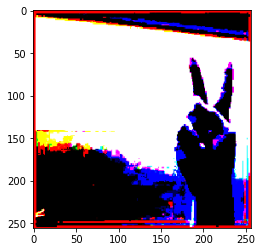

In [7]:
# https://github.com/keras-team/keras-applications/blob/master/keras_applications/imagenet_utils.py

for X, y in train_gen:
    print(X.shape, y.shape)
    plt.imshow(X[0])
    break

## Load the model


In [8]:
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(input_shape[0], input_shape[1], 3))
base_model.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
__________________________

In [9]:
# x = Flatten()(base_model.output) # если обучать на флаттене, будет 67 млн параметров - очень долго
# поэтому берём вместо флатена усреднённый пулинг
x = GlobalAvgPool2D()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [10]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
results = model.evaluate(val_gen, verbose=1, steps=100)

print(f"Test Loss: {results[0]:.5f}")
print(f"Test Accuracy: {results[1] * 100:.2f}%")

100/100 [==============================] - 28s 233ms/step - loss: 3.7726 - accuracy: 0.0465
Test Loss: 3.77250
Test Accuracy: 4.59%


## Train the model

Напишем модель на TensorFlow на низком уровне абстракции.

In [12]:
import keras
from keras.optimizers import Adam
import tensorflow as tf
import numpy as np


optimizer = Adam(learning_rate=0.001) 
loss_fn = keras.losses.CategoricalCrossentropy()


def train_model(model=None, epochs=None, train_gen=train_gen, steps_per_epoch=100):
    grad_log=[]
    for epoch in range(epochs): 

        for step, (x_batch, y_batch) in enumerate(train_gen): 
            if step > steps_per_epoch:
                break
            
            with tf.GradientTape() as tape:
                preds = model(x_batch) 

                # Вычислим значение потерь для этого батча
                loss_value = loss_fn(y_batch, preds)

                # Используем gradient tape для автоматического извлечения градиентов 
                # обучаемых переменных относительно потерь
                grads = tape.gradient(loss_value, model.trainable_weights) 
            
                g_g = []
                # пишем логи для сохранения значений градиента и веса по одной цепи 
                for g_s in grads:   
                    if len(g_s.numpy().shape)==1:
                        g_g.append(g_s.numpy()[0])
                    if len(g_s.numpy().shape) == 2:
                        g_g.append(g_s.numpy()[0, 0]) 
                    if len(g_s.numpy().shape) == 3:
                        g_g.append(g_s.numpy()[0, 0, 0]) 
                    if len(g_s.numpy().shape) == 4:
                        g_g.append(g_s.numpy()[0, 0, 0, 0]) 

                # добавляем текущие логи по слоям к общей записи
                grad_log.append(g_g)
        
                # Выполним один шаг градиентного спуска обновив # значение переменных минимизирующих потери. 
                optimizer.apply_gradients(zip(grads, model.trainable_weights)) 
                if step % (steps_per_epoch // 2) == 0: 
                    print(f'Эпоха {epoch + 1}/{epochs}', end='. ')
                    print(f'Шаг {step}. Лосс на обучении (для одного батча) на шаге: {loss_value}') 
                    print(f'Уже увидели: {(step + 1) * batch_size} примеров')
                    
    grad_log=np.array(grad_log)
    return grad_log, model

In [13]:
grad_log, models = train_model(model, 2, train_gen, steps_per_epoch=50)

Эпоха 1/2. Шаг 0. Лосс на обучении (для одного батча) на шаге: 3.532884120941162
Уже увидели: 32 примеров
Эпоха 1/2. Шаг 25. Лосс на обучении (для одного батча) на шаге: 3.364835739135742
Уже увидели: 832 примеров
Эпоха 1/2. Шаг 50. Лосс на обучении (для одного батча) на шаге: 3.4064388275146484
Уже увидели: 1632 примеров
Эпоха 2/2. Шаг 0. Лосс на обучении (для одного батча) на шаге: 3.397237777709961
Уже увидели: 32 примеров
Эпоха 2/2. Шаг 25. Лосс на обучении (для одного батча) на шаге: 3.3695833683013916
Уже увидели: 832 примеров
Эпоха 2/2. Шаг 50. Лосс на обучении (для одного батча) на шаге: 3.3616254329681396
Уже увидели: 1632 примеров


Посмотрим на градиенты на слоях

In [14]:
def visual_grad(grad_log=None, numb_layer=-1):
    s_g = grad_log.shape

    plt.figure(figsize=(16, 5))
    plt.title('Градиент по слоям')
    plt.xlabel('№ layer')
    plt.ylabel('grad')
    plt.grid()
    plt.plot(np.abs(grad_log[0, :numb_layer]),
             label='step 0')
    plt.plot(np.abs(grad_log[s_g[0] // 10, :numb_layer]),
             label=f'step {str(s_g[0] // 10)}')
    plt.plot(np.abs(grad_log[s_g[0] // 3, :numb_layer]),
             label=f'step {str(s_g[0] // 3)}')
    plt.plot(np.abs(grad_log[s_g[0]-1 , :numb_layer]),
             label=f'step {str(s_g[0] )}')
    plt.legend()
    plt.show()

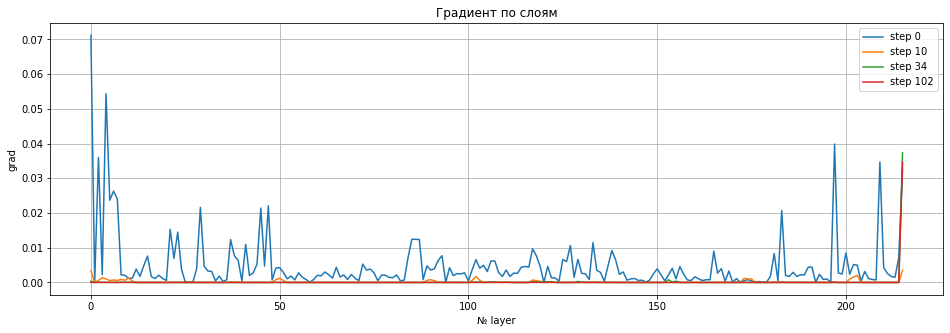

In [18]:
visual_grad(grad_log=grad_log, numb_layer=300)

Продолжим обучение модели на Keras.

По факту нам не нужно обучать всё то что было в ResNet. ResNet хорошо обучился на ImageNet, поэтому нет смысла изменять эти веса. Будем обучать только миллион параметров в последних 3-х весах.

In [21]:
#  пройдём по всем весам и заморозим все, кроме 3-х последних
for layer in model.layers[:-3]:
    layer.trainable = False
    
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [22]:
history = model.fit(
                train_gen,
                epochs=num_epoch,
                steps_per_epoch=50,
                validation_data=val_gen,
                validation_steps=10,
                callbacks=[
                    ModelCheckpoint(
                        filepath='best_model_{epoch}ep_{val_accuracy:.2f}',
                        save_best_only=True
                    )
                ]
            )

Epoch 1/4
50/50 [==============================] - 20s 302ms/step - loss: 2.5947 - accuracy: 0.2775 - val_loss: 3.3364 - val_accuracy: 0.0531
Epoch 2/4
50/50 [==============================] - 15s 301ms/step - loss: 0.8886 - accuracy: 0.7063 - val_loss: 10.5076 - val_accuracy: 0.1094
Epoch 3/4
50/50 [==============================] - 15s 297ms/step - loss: 0.4852 - accuracy: 0.8263 - val_loss: 3.5393 - val_accuracy: 0.4812
Epoch 4/4
50/50 [==============================] - 15s 287ms/step - loss: 0.1880 - accuracy: 0.9388 - val_loss: 1.7335 - val_accuracy: 0.6687


Правильный порядок таков, что мы скачиваем предобученные на Имадженете веса РезНета, замораживаем их потому что модель уже хорошо обучена. Т.е. в ячейке ниже мы обучаем 0 параметров.

In [23]:
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(input_shape[0], input_shape[1], 3))
base_model.trainable = False
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

поверх обученного РезНета ставим усредняющий пулинг, чтобы схлопнуть все размерности. Добавляем дропаут, батчнорм и классификация в конце. И уже это будет хорошо обучаться. Мы по факту обучаем последние 2 слоя. Резнет уже обучлся, поэтому мы этим пользуемся.

In [49]:
x = GlobalAvgPool2D()(base_model.output)
x = Dropout(0.1)(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [50]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [51]:
history = model.fit(
                train_gen,
                epochs=num_epoch,
                steps_per_epoch=50,
                validation_data=val_gen,
                validation_steps=10,
                callbacks=[
                    ModelCheckpoint(
                        filepath='best_model_{epoch}ep_{val_accuracy:.2f}',
                        save_best_only=True
                    )
                ]
            )

Epoch 1/4
50/50 [==============================] - 14s 223ms/step - loss: 1.9221 - accuracy: 0.5143 - val_loss: 1.7839 - val_accuracy: 0.4563
Epoch 2/4
50/50 [==============================] - 10s 199ms/step - loss: 0.3190 - accuracy: 0.9111 - val_loss: 1.4280 - val_accuracy: 0.6031
Epoch 3/4
50/50 [==============================] - 10s 200ms/step - loss: 0.2352 - accuracy: 0.9299 - val_loss: 0.8632 - val_accuracy: 0.7344
Epoch 4/4
50/50 [==============================] - 10s 198ms/step - loss: 0.1702 - accuracy: 0.9530 - val_loss: 0.7813 - val_accuracy: 0.7656


Видим, что модель переобучается. В этом случае лучше всего взять модель попроще, например мнесто ResNet50 - ResNet30 или даже с ещё меньшим количеством слоёв.

Второй способ борьбы с переобучением - повставлять дропауты между слоями.

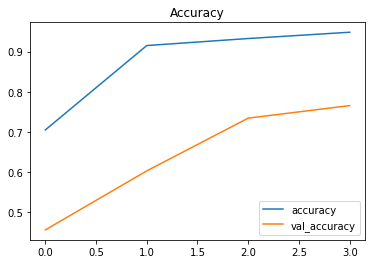

In [52]:
import pandas as pd
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

## Test Images

In [53]:
results = model.evaluate(val_gen, verbose=1, steps=100)

print(f"Test Loss: {results[0]:.5f}")
print(f"Test Accuracy: {results[1] * 100:.2f}%")

100/100 [==============================] - 15s 145ms/step - loss: 0.8389 - accuracy: 0.7513
Test Loss: 0.83889
Test Accuracy: 75.13%


## Visualize the result


In [54]:
from pathlib import Path
import cv2


def show_predictions(preprocess_input, test_path):
    imgs = sorted(list(Path(test_path).glob('*.jpg')))
    print(len(imgs))

    columns = 7
    row = round(len(imgs) / columns)

    fig, ax = plt.subplots(row, columns, figsize=(columns * row, row * columns))
    plt.subplots_adjust(wspace=0.1, hspace=0.2)

    i, j = 0, 0
    # в OpenCV идёт другое представление каналов, поэтому переводим из BGR в RGB
    for img_path in imgs:
        origin_img = cv2.imread(str(img_path))
        origin_img = cv2.cvtColor(origin_img, cv2.COLOR_BGR2RGB)
        label = img_path.parts[-1].split('_')[0]
        
        # умньшаем до 256х256, потому что мы обучались на таких картинках
        img = cv2.resize(origin_img, (256, 256))
        img = preprocess_input(img)

        prediction = model.predict(img[None])

        labels = (train_gen.class_indices)
        labels = dict((v,k) for k,v in labels.items())
        
        ax[i][j].imshow(origin_img)
        ax[i][j].set_title(f'GT {label}. Pred {labels[np.argmax(prediction, axis=1)[0]]}')
        ax[i][j].axis('off')
        j += 1
        if j == columns:
            j = 0
            i += 1

    plt.show()

28


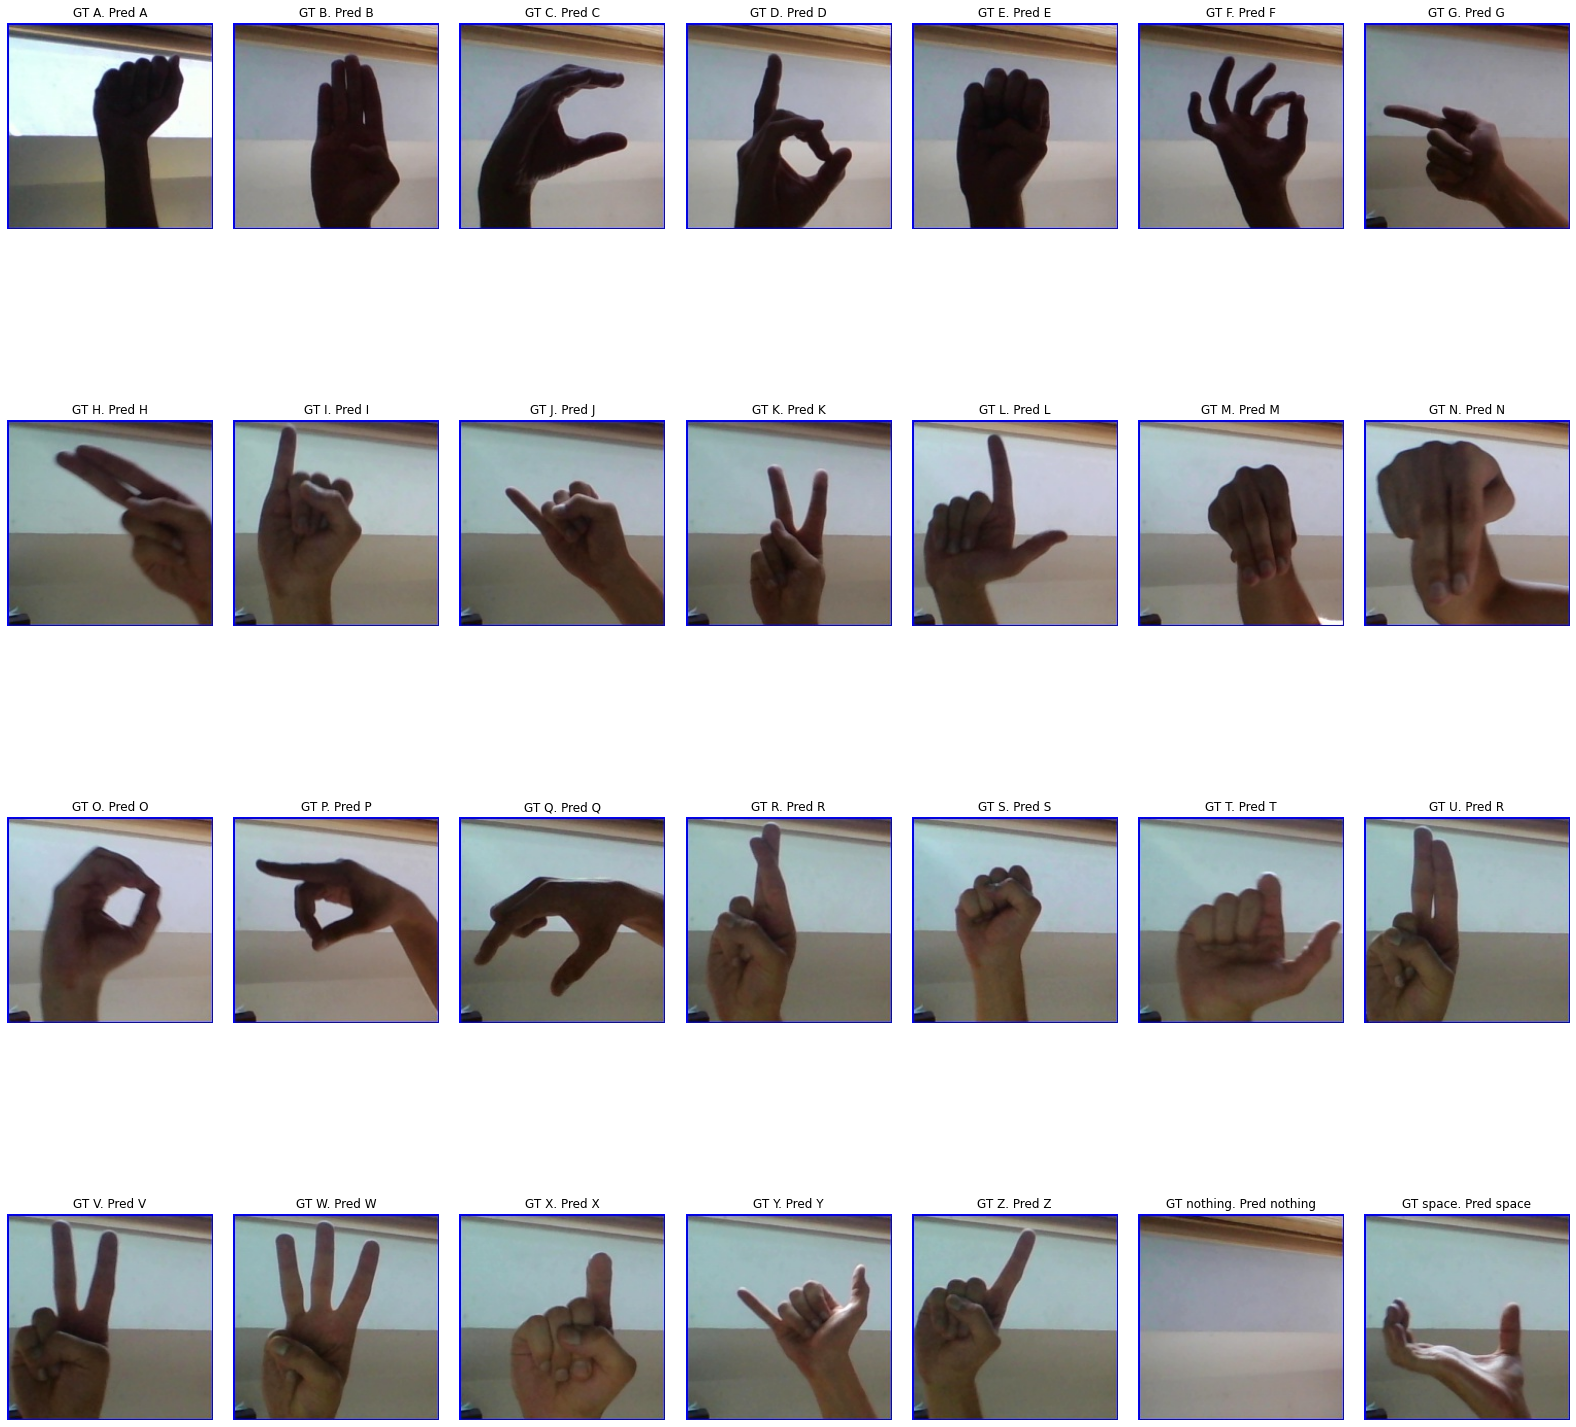

CPU times: user 4.56 s, sys: 48 ms, total: 4.61 s
Wall time: 4.62 s


In [55]:
%%time
show_predictions(resnet_preproc, test_data_path)